In [1]:
import pandas as pd
import numpy as np
import scipy as scp

In [2]:
data = pd.read_csv('../openfoodfacts.csv',delimiter='\t',low_memory=False)

In [3]:
#data["origins_tags"].value_counts().to_frame()
print(data.shape) # 681'602
print(data["code"].value_counts().count()) # 681533
print(data["manufacturing_places_tags"].value_counts().count()) # 11731
print(data["manufacturing_places"].value_counts().count()) # 12884
print(data["categories"].value_counts().count()) # 62746
print(data["origins_tags"].value_counts().count()) # 6606



(681602, 173)
681533
11731
12884
62746
6606


# Data for distance computation

In [8]:
a = ~data["first_packaging_code_geo"].isnull() # 27572
b = ~data["origins_tags"].isnull()
c = ~data["manufacturing_places_tags"].isnull()

sele = a | b | c  # 88001

data_loc = data[sele] # 88001 
print(data_loc.shape)

sel = ['categories_en', 'main_category_en', 'labels_en', 'origins_tags', 'manufacturing_places_tags', 
       'first_packaging_code_geo', 'countries_en']

data_loc = data_loc[sel]
data_loc

(88001, 173)


,categories_en,main_category_en,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
106,Dietary supplements,Dietary supplements,Made in France,NaN,france,NaN,France
251,"Meals,Meat-based products,Meals with meat,Poul...",Meals,"fr:Viande Française,Made in France",france,france,NaN,France
254,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,quebec,brossard-quebec,NaN,Canada
264,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
269,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,france,united-kingdom,NaN,United Kingdom
274,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
285,fr:Boulange,fr:Boulange,NaN,quebec,"brossard,quebec",NaN,Canada
289,"Beverages,Carbonated drinks,Sodas,Sugared beve...",Beverages,"Kosher,Contains GMOs",NaN,etats-unis,NaN,"France,United States"
292,"Sugary snacks,Biscuits and cakes,Biscuits,Shor...",Sugary snacks,Green Dot,NaN,"france,avranches",NaN,France
296,"Meals,Pizzas pies and quiches,Quiches,Lorraine...",Meals,NaN,quebec,"brossard,quebec",NaN,Canada


In [ ]:
data_loc.to_csv('LocalisationData.csv')

# Data for palm oil consumption

In [11]:
misc_data = ['main_category_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 
             'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n',
             'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags']

data_palm = data[misc_data]
data_palm = data_palm.dropna(how='all')
data_palm

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,main_category_en
10,0.0,NaN,NaN,0.0,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,Pies
15,0.0,NaN,NaN,0.0,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based foods and beverages
22,0.0,NaN,NaN,0.0,NaN,NaN,NaN
31,0.0,NaN,NaN,0.0,NaN,NaN,NaN
33,0.0,NaN,NaN,0.0,NaN,NaN,NaN
34,0.0,NaN,NaN,0.0,NaN,NaN,NaN
35,0.0,NaN,NaN,0.0,NaN,NaN,NaN
39,0.0,NaN,NaN,0.0,NaN,NaN,NaN


# Data on water in bottle

In [5]:
data_Beverages = data[data["main_category_en"] == 'Beverages']
info = ['categories', 'categories_tags', 'categories_en','main_category', 'main_category_en']
data_Beverages[info]

,categories,categories_tags,categories_en,main_category,main_category_en
289,"Boissons,Boissons gazeuses,Sodas,Boissons sucr...","en:beverages,en:carbonated-drinks,en:sodas,en:...","Beverages,Carbonated drinks,Sodas,Sugared beve...",en:beverages,Beverages
294,en:beverages,"en:beverages,en:non-alcoholic-beverages","Beverages,Non-Alcoholic beverages",en:beverages,Beverages
304,en:beverages,"en:beverages,en:non-alcoholic-beverages","Beverages,Non-Alcoholic beverages",en:beverages,Beverages
305,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...",en:beverages,Beverages
356,"Boissons,Boissons alcoolisées,Vins,Vins frança...","en:beverages,en:alcoholic-beverages,en:wines,e...","Beverages,Alcoholic beverages,Wines,Wines from...",en:beverages,Beverages
420,Sodas au cola,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Beverages,Carbonated drinks,Sodas,Colas,Sugare...",en:beverages,Beverages
440,en:beverages,"en:beverages,en:sugared-beverages","Beverages,Sugared beverages",en:beverages,Beverages
521,"Sodas au citron,Boissons sucrées","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...",en:beverages,Beverages
761,Soda,"en:beverages,en:carbonated-drinks,en:sodas,en:...","Beverages,Carbonated drinks,Sodas,Sugared beve...",en:beverages,Beverages
827,Smoothies,"en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...",en:beverages,Beverages


In [42]:
data[data["categories"] == 'Water'] # 8 products
data[data["categories"] == 'Eau'] # 3 products

#data[data["categories_en"] == 'Water']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
210588,2000000017811,http://world-en.openfoodfacts.org/product/2000...,akeamazan,1431435875,2015-05-12T13:04:35Z,1431436204,2015-05-12T13:10:04Z,Eau Vitale,Eau embouteillée,"1,5 l",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269031,3068320117577,http://world-en.openfoodfacts.org/product/3068...,tbropen,1538992536,2018-10-08T09:55:36Z,1538992829,2018-10-08T10:00:29Z,Evian - Paris edition,NaN,33 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596566,7613036410212,http://world-en.openfoodfacts.org/product/7613...,openfoodfacts-contributors,1537710276,2018-09-23T13:44:36Z,1537710869,2018-09-23T13:54:29Z,Nestlé Pure Life,Eau minérale,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data["categories_en"].dropna()

11                             Pies,Sweet pies,Coconut pies
17        Plant-based foods and beverages,Plant-based fo...
46        Plant-based foods and beverages,Plant-based fo...
48        Seafood,Fishes,Salmons,Smoked fishes,Smoked sa...
106                                     Dietary supplements
109                                       fr:Filet-de-boeuf
251       Meals,Meat-based products,Meals with meat,Poul...
252                                   Meals,Microwave meals
254       Plant-based foods and beverages,Plant-based fo...
264               Sugary snacks,Biscuits and cakes,Pastries
269       Plant-based foods and beverages,Plant-based fo...
274               Sugary snacks,Biscuits and cakes,Pastries
285                                             fr:Boulange
287       Plant-based foods and beverages,Plant-based fo...
289       Beverages,Carbonated drinks,Sodas,Sugared beve...
292       Sugary snacks,Biscuits and cakes,Biscuits,Shor...
294                       Beverages,Non-

In [34]:
# split the categories
z = data["categories_en"].str.split(',').apply(pd.Series)
print(type(z))
print(z.shape)
print(z.head())

<class 'pandas.core.frame.DataFrame'>
(681602, 40)
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN   

    34   35   36   37   38   39  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 40 columns]


In [33]:
z1 = z.unstack().dropna()
print(type(z1))
print(z1.shape)
print(z1.head())

<class 'pandas.core.series.Series'>
(958122,)
0  11                                Pies
   17     Plant-based foods and beverages
   46     Plant-based foods and beverages
   48                             Seafood
   106                Dietary supplements
dtype: object


In [35]:
data_water = z1[z1=='Waters']
print(type(data_water))
print(data_water.shape)
data_water.head()

<class 'pandas.core.series.Series'>
(1344,)


1  4235     Waters
   11241    Waters
   13136    Waters
   19112    Waters
   19113    Waters
dtype: object

In [36]:
water_df = data_water.to_frame()
print(type(water_df))
print(water_df.shape)
water_df.head()

<class 'pandas.core.frame.DataFrame'>
(1344, 1)


0
1 4235   Waters
  11241  Waters
  13136  Waters
  19112  Waters
  19113  Waters

In [22]:
water_df.index = water_df.index.droplevel(0)#.tolist()
water_df.head()

,0
4235,Waters
11241,Waters
13136,Waters
19112,Waters
19113,Waters


In [25]:
water_idx = water_df.index.tolist()
water_idx

[4235,
 11241,
 13136,
 19112,
 19113,
 25859,
 54252,
 55752,
 62791,
 64589,
 72080,
 75050,
 76230,
 76489,
 76694,
 83860,
 97452,
 97453,
 99639,
 105413,
 108432,
 108433,
 108434,
 114564,
 116484,
 116485,
 119654,
 120311,
 120371,
 122958,
 122990,
 135575,
 140520,
 141191,
 141295,
 151951,
 151973,
 155443,
 159202,
 170478,
 170862,
 171008,
 171437,
 171530,
 171534,
 172505,
 174526,
 175555,
 175559,
 183440,
 184956,
 191159,
 191706,
 191707,
 197527,
 206825,
 207041,
 207076,
 207363,
 208165,
 208680,
 209302,
 209485,
 209910,
 210110,
 210197,
 210274,
 210386,
 210387,
 210389,
 210588,
 211028,
 211407,
 211610,
 211868,
 214624,
 214792,
 217635,
 218919,
 219500,
 223221,
 223222,
 223637,
 224630,
 230765,
 236749,
 245271,
 245328,
 245331,
 245333,
 245346,
 251241,
 252457,
 266676,
 266677,
 266678,
 266679,
 266680,
 266681,
 266684,
 266687,
 266689,
 267357,
 267358,
 267361,
 267362,
 267364,
 267366,
 267371,
 267383,
 267384,
 267386,
 267388,
 26

In [45]:
#a = ~data["first_packaging_code_geo"].isnull()
water_info = data[data.index.isin(water_idx)]
water_info.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
4235,0011110816405,http://world-en.openfoodfacts.org/product/0011...,openfoodfacts-contributors,1424695179,2015-02-23T12:39:39Z,1437873094,2015-07-26T01:11:34Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11241,0012000001086,http://world-en.openfoodfacts.org/product/0012...,date-limite-app,1441731042,2015-09-08T16:50:42Z,1463774905,2016-05-20T20:08:25Z,Water,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13136,0015000140069,http://world-en.openfoodfacts.org/product/0015...,tacinte,1439126517,2015-08-09T13:21:57Z,1439232757,2015-08-10T18:52:37Z,Pure Water,Purified Water,1 GAL (3.79 L),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15055,0016571111137,http://world-en.openfoodfacts.org/product/0016...,openfoodfacts-contributors,1361826495,2013-02-25T21:08:15Z,1489143636,2017-03-10T11:00:36Z,Sparkling mountain spring water,Sparkling mountain spring water,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19112,0021130074471,http://world-en.openfoodfacts.org/product/0021...,bdwyer,1470609855,2016-08-07T22:44:15Z,1470622215,2016-08-08T02:10:15Z,Drinking Water,water from a municipal source,1 GALLON (3.78l),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
sel = ['product_name','brands', 'brands_tags','categories_en', 'main_category_en', 'origins_tags', 'manufacturing_places_tags', 
       'first_packaging_code_geo', 'countries_en','energy_100g','sugars_100g']
water_info[sel]

,product_name,brands,brands_tags,categories_en,main_category_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en,energy_100g,sugars_100g
4235,NaN,NaN,NaN,"Beverages,Waters,Non-Alcoholic beverages",Beverages,NaN,NaN,NaN,United States,NaN,NaN
11241,Water,Aquafina,aquafina,"Beverages,Waters,Non-Alcoholic beverages",Beverages,NaN,NaN,NaN,United States,NaN,NaN
13136,Pure Water,"Gerber,Nestlé","gerber,nestle","Beverages,Waters,Non-sugared beverages,Non-Alc...",Beverages,NaN,NaN,NaN,United States,NaN,NaN
15055,Sparkling mountain spring water,"talking rain, Talking Rain Beverage Co. Inc","talking-rain,talking-rain-beverage-co-inc","Beverages,Carbonated drinks,Waters,Spring wate...",Beverages,NaN,NaN,NaN,United States,0.0,NaN
19112,Drinking Water,NaN,NaN,"Beverages,Waters,Non-Alcoholic beverages",Beverages,NaN,NaN,NaN,United States,NaN,NaN
19113,refreshe drinking water,"refreshe,Safeway","refreshe,safeway","Beverages,Waters,Drinking water,Non-sugared be...",Beverages,NaN,NaN,NaN,United States,NaN,NaN
25859,Kirkland Drinking Water,NaN,NaN,"Beverages,Waters,Non-sugared beverages,Non-Alc...",Beverages,NaN,NaN,NaN,United States,NaN,NaN
33027,Lemon & Lime Sparkling Water,Marks & Spencer,marks-spencer,"Beverages,Artificially sweetened beverages,Car...",Beverages,NaN,NaN,NaN,"France,United Kingdom",50.0,0.40
35925,Gatorade sabor Ponche de Frutas,Gatorade,gatorade,"Beverages,Carbonated drinks,Waters,Carbonated ...",Beverages,mexico,estado-de-mexico,NaN,Mexico,102.0,6.00
35927,Gatorade Fierce Sabor Moras,Gatorade,gatorade,"Beverages,Carbonated drinks,Waters,Carbonated ...",Beverages,mexico,estado-de-mexico,NaN,Mexico,102.0,6.00


# Data where carbon footprint specified on product 
==> compute link with distance

In [47]:
data_fp = data[~data["carbon-footprint_100g"].isnull()]
#sel = sel.append("carbon-footprint_100g")
sel = ['categories_en', 'main_category_en',"carbon-footprint_100g", 'labels_en', 'origins_tags', 'manufacturing_places_tags', 
       'first_packaging_code_geo', 'countries_en']
data_fp = data_fp[sel]
data_fp

,categories_en,main_category_en,carbon-footprint_100g,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
144423,NaN,NaN,68.000000,Carbon footprint,NaN,NaN,NaN,France
183478,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,300.000000,Carbon footprint,chine,chine,NaN,Canada
210366,NaN,NaN,0.000000,Carbon footprint,NaN,NaN,NaN,NaN
211502,NaN,NaN,0.000000,"Carbon footprint,Carbon footprint",batook-chewing-gum,batook-chewing-gum-saudi-arabia,NaN,World
211772,"Seafood,Fishes,Sardines,Poissons,Produits-de-l...",Seafood,12.000000,"Bio,Empreinte-carbone,Carbon footprint",usa,NaN,NaN,China
211958,Groceries,Groceries,0.011000,"Halal,Carbon footprint","sugar,salt",australia,NaN,Australia
212328,es:Agua-embotellada,es:Agua-embotellada,0.000000,"es:Ecoce,Carbon footprint",cd-de-mexico,cd-de-mexico,NaN,Mexico
212373,"Meat-based products,Terrine,fr:Terrines de che...",Meat-based products,0.050000,"Carbon footprint,fr:Fait-maison,Carbon footprint","france,saveur-occitanie","bagard,gard,occitanie,france,30140","44.083333,4.066667",France
212381,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,0.050000,"fr:Fait-maison,Carbon footprint","france,saveur-occitanie","france,occitanie,gard,bagard,30,30140","44.083333,4.066667",France
212464,pl:Bugs,pl:Bugs,-0.000281,"Carbon footprint,pl:Looking-for-bugs,Carbon fo...",poland,NaN,NaN,Poland


In [62]:
data_fp["carbon-footprint_100g"].describe()

count     342.000000
mean      271.528992
std       405.252492
min        -0.000281
25%         2.300000
50%       150.000000
75%       338.750000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64

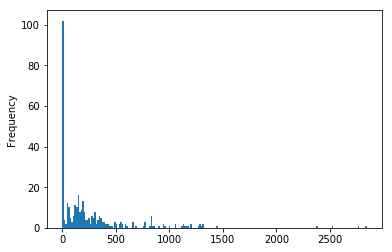

In [63]:
data_fp["carbon-footprint_100g"].plot.hist(200)

'Vegan' label

In [23]:
data_label = data[~data["labels_en"].isnull()]
data_label["labels_en"].value_counts()

Organic                                                                                                                                                                          16425
Green Dot                                                                                                                                                                         6287
Organic,EU Organic,fr:AB Agriculture Biologique                                                                                                                                   5623
Vegetarian,Vegan                                                                                                                                                                  1919
Made in France                                                                                                                                                                     867
PDO                                                                                  

Avant d'aller plus loin je pense qu'il faudrait faire un split des labels ==> par exemple "vegan" revient dans plusieurs lignes.. 